# Downloading libraries

In [1]:
library(ggfortify)
library(tseries)
library(forecast)
library(datasets)

Loading required package: ggplot2

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Registered S3 methods overwritten by 'forecast':
  method                 from     
  autoplot.Arima         ggfortify
  autoplot.acf           ggfortify
  autoplot.ar            ggfortify
  autoplot.bats          ggfortify
  autoplot.decomposed.ts ggfortify
  autoplot.ets           ggfortify
  autoplot.forecast      ggfortify
  autoplot.stl           ggfortify
  autoplot.ts            ggfortify
  fitted.ar              ggfortify
  fortify.ts             ggfortify
  residuals.ar           ggfortify



In [2]:
library(MASS)

In [3]:
library(tidyverse)
library(magick)
library(tesseract)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ lubridate 1.9.2     ✔ tibble    3.2.1
✔ purrr     1.0.1     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ dplyr::select() masks MASS::select()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Linking to ImageMagick 6.9.10.23
Enabled features: fontconfig, freetype, fftw, lcms, pango, webp, x11
Disabled features: cairo, ghostscript, heic, raw, rsvg

Using 4 threads



# 1

a) Plot the data

In [4]:
# Step 1: Create a vector of dates representing the successive 4-week periods
start_date <- as.Date("1967-01-01")  # Start date of the time series
end_date <- as.Date("1970-12-01")  # End date of the time series

# Create a sequence of dates with a 4-week interval
dates <- seq(start_date, end_date, by = "4 weeks")

# Step 2: Create a vector of values corresponding to each 4-week period
values <- c(153,189,221,215,302,223,201,173,121,106,86,87,108,
            133,177,241,228,283,255,238,164,128,108,87,74,95,
            145,200,187,201,292,220,233,172,119,81,65,76,74,
            111,170,243,178,248,202,163,139,120,96,95,53,94)


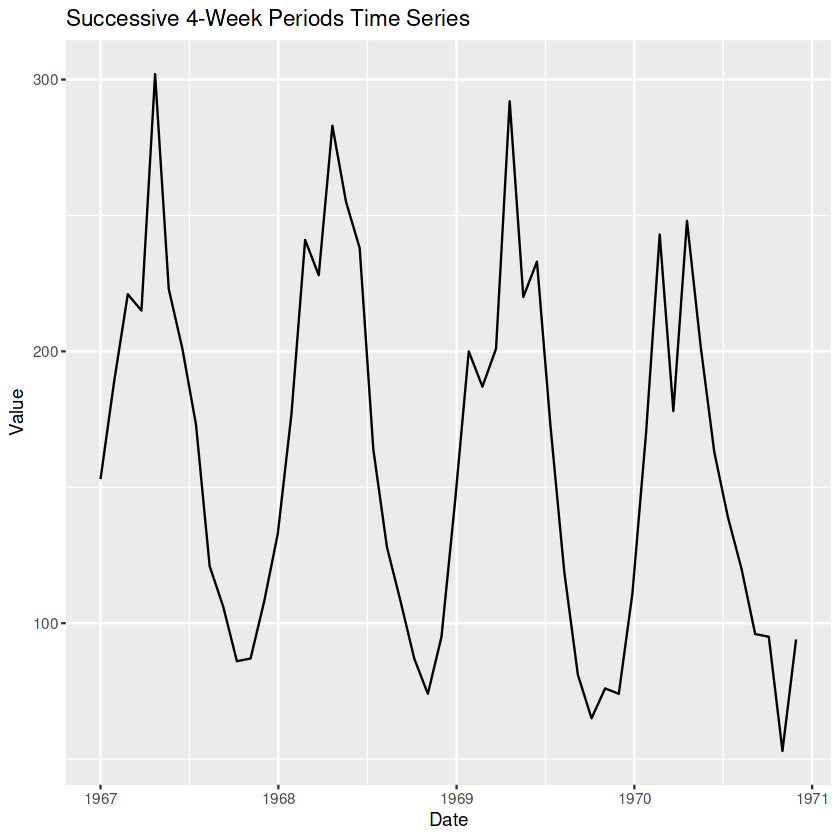

In [5]:

# Step 3: Combine the dates and values into a dataframe
df <- data.frame(date = dates, value = values)


rownames(df) <- df$date

# Step 4: Plot the time series
library(ggplot2)

# Create a time series plot
ggplot(df, aes(x = date, y = value)) +
  geom_line() +
  labs(x = "Date", y = "Value") +
  ggtitle("Successive 4-Week Periods Time Series")

b) Assess the trend and seasonal effect

By the graph, there appears to be no annual trend .Only a seasonal variation is present

In [6]:
# Use estimation Xt= mt +c + a sin(pi/2 t) +e_t

In [7]:
model <- function(t, m,a1,c) {
  c+m*t + a1*sin((pi/2)*t) 
}

fit <- nls(values ~ model(1:52, m,a1,c), start = list(m=0,a1=0,c=0))

co <- coef(fit)
co

m          a1           c 
 -1.2431334   0.8722512 193.9622658

m is insignificant with respect to values and c, hence no annual trnd exists

# 2

a) Plot the observations

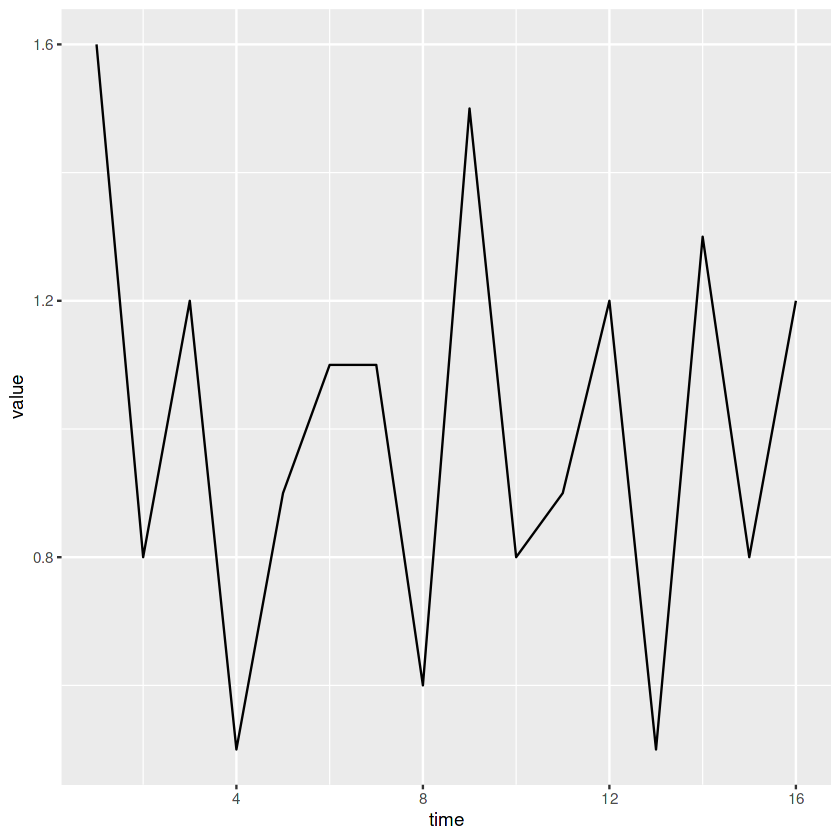

In [8]:
values<-c(1.6,0.8,1.2,0.5,0.9,1.1,1.1,0.6,
        1.5,0.8,0.9,1.2,0.5,1.3,0.8,1.2)

time<-seq(1,16)
df<-data.frame(t=time,value=values)
ggplot(df,aes(x=time,y=value))+
  geom_line() 

b) Autocorrelation values seems to be large or in range of 0.4 to 1

c) Plot xt and xt+1

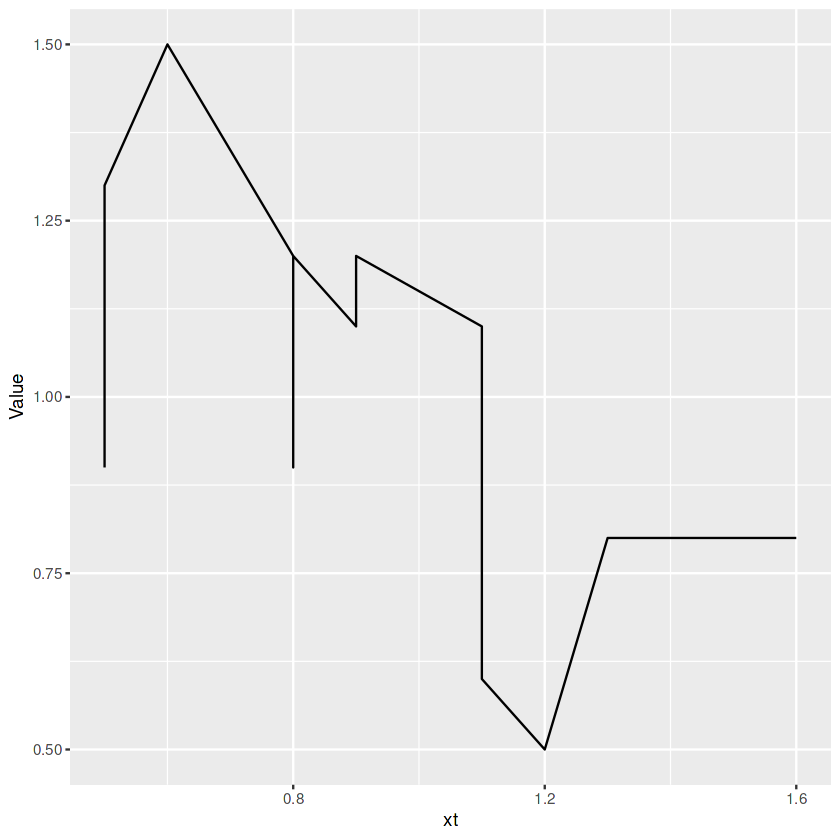

In [9]:
xt<-values[0:15]
xt1<-values[2:16]

df2<-data.frame(xt=xt,xt1=xt1)
ggplot(df2, aes(x = xt, y = xt1)) +
  geom_line() +
  labs(x = "xt", y = "Value")

There appears to be a negative autocorrelation for lag 1 in the range -0.4 to -0.8

d)Calculate autocorrelation for lag 1  i.e rho1

In [10]:
sum<-Reduce('+',values)

n<-length(values)
mean<-sum/n

vals=values-mean

v_0=Reduce("+",vals*vals)/n
v_1=Reduce("+",(xt1-mean)*(xt-mean))/n

rho1=v_1/v_0
rho1



[1] -0.5487805

# 3

For the airline passengers data already available in R,plot the autocorrelation function(ACF) for arange of lag values.

In [11]:

#load data
data(AirPassengers)
dat<-AirPassengers
#check data format
dat

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336
1958,340,318,362,348,363,435,491,505,404,359,310,337


In [12]:
#vectorise to ge form {xt} ,t=1 to n
x <- as.vector(AirPassengers)

# Remove the names (headers)
names(x) <- NULL


In [13]:
#Function to calculate autocorrelation for some lag h
autocorrel<-function(values,h){
    
    sum<-Reduce('+',values)

    n<-length(values)
    mean<-sum/n
    
    xth=values[(h+1):n]
    xt=values[1:(n-h)]
    
    vals=values-mean

    v_0=Reduce("+",vals*vals)/n
    v_h=Reduce("+",(xth-mean)*(xt-mean))/n

    rho_h=v_h/v_0
    
    return(rho_h)
}



In [14]:
# Calculating autocorrelation for lag in range of len(x)
y=c()
h<-seq(1,length(x)-1)

for (i in h) {
  result <- autocorrel(x,i)  
  y <- c(y, result)
}

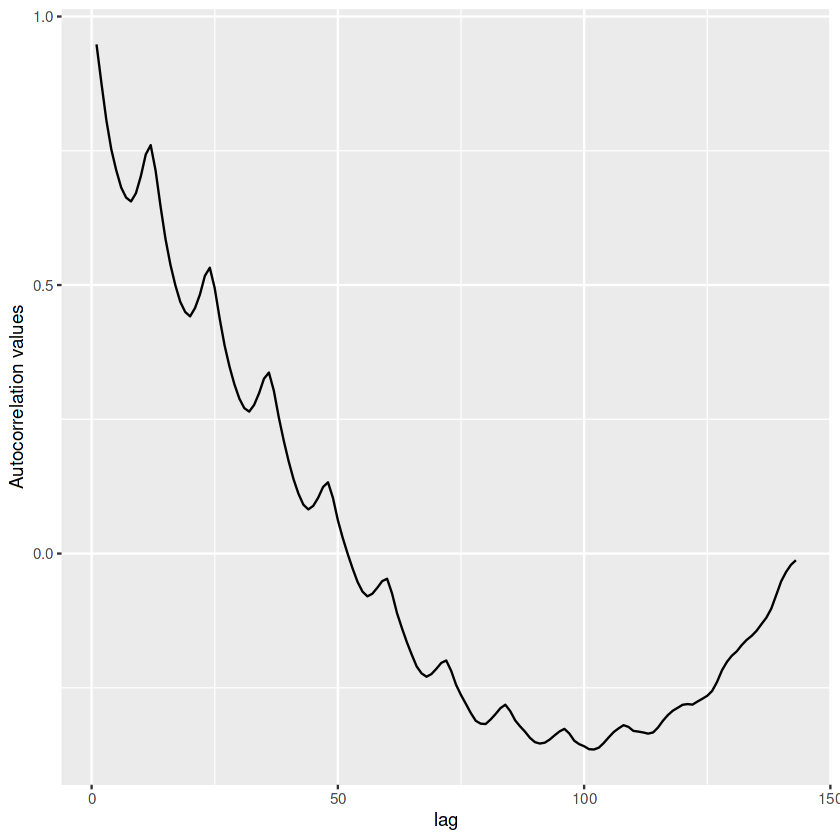

In [15]:
#Ploting
df3<-data.frame(h=h,y=y)
ggplot(df3, aes(x =h, y = y)) +
  geom_line() +
  labs(x = "lag", y = "Autocorrelation values")

**Interpret the results.**
The ACF values decreases. This is known as a decaying pattern and indicates that the influence of past observations diminishes with time.

Also, there is no major jump at a particular value , hence no seasonal pattern is found

# 4

In [16]:
data <- c(2.7, 7.8, 6.2, 10.7, 9.6, 14.0, 13.2, 16.1, 17.9, 22.2, 
          23.7, 24.6, 24.6, 28.7, 28.6, 34.5, 34.1, 39.0, 38.7, 43.2, 
          42.3, 46.2, 46.3, 48.5, 49.8)

n <- length(data)  # Number of observations
t <- 1:n            # Time index from 1 to n

In [17]:
# Model: X_t = a0 + a1*t + b1*cos(lambda*t) + c1*sin(lambda*t) + epsilon_t
# Coefficients to estimate: a0, a1, b1, c1
# lambda is known as pi in this case

lambda <- pi

In [18]:
X <- matrix(0, nrow = n, ncol = 4)
X[, 1] <- 1           # Intercept (a0)
X[, 2] <- t           # Linear trend (a1)
X[, 3] <- cos(lambda * t)  # Cosine component (b1)
X[, 4] <- sin(lambda * t)  # Sine component (c1)



In [19]:
sv <- ginv(t(X) %*% X)

coefficients <- sv %*% t(X) %*% data
a0 <- coefficients[1]
a1 <- coefficients[2]
b1 <- coefficients[3]
c1 <- coefficients[4]

cat("Estimated Coefficients:\n")
cat("a0:", a0, "\n")
cat("a1:", a1, "\n")
cat("b1:", b1, "\n")
cat("c1:", c1, "\n")

Estimated Coefficients:
a0: 1.142628 
a1: 1.986538 
b1: 0.9907051 
c1: -4.031504e-15 
